In [4]:
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

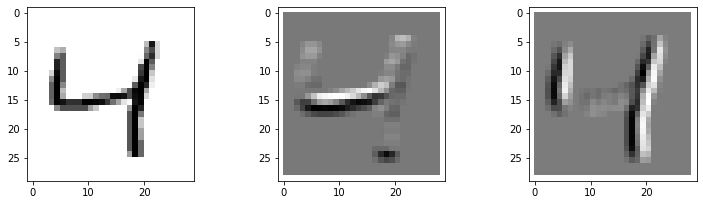

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

id_img = 2
myfil1 = np.array([[1, 1, 1], [1, 1, 1], [-2, -2, -2]], dtype = float)
myfil2 = np.array([[-2, 1, 1], [-2, 1, 1], [-2, 1, 1]], dtype = float)

x_img = x_train[id_img, :, :, 0]
img_h = 28
img_w = 28
x_img = x_img.reshape(img_h, img_w)
out_img1 = np.zeros_like(x_img)
out_img2 = np.zeros_like(x_img)

for ih in range(img_h - 3):
    for iw in range(img_w - 3):
        img_part = x_img[ih:ih+3, iw:iw+3]
        out_img1[ih+1, iw+1] = np.dot(img_part.reshape(-1), myfil1.reshape(-1))
        out_img2[ih+1, iw+1] = np.dot(img_part.reshape(-1), myfil2.reshape(-2))
        
plt.figure(1, figsize=(12,3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()
plt.subplot(1, 3, 1)
plt.pcolor(1-x_img)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.subplot(1, 3, 2)
plt.pcolor(-out_img1)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.subplot(1, 3, 3)
plt.pcolor(-out_img2)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.show()

In [6]:
import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import Adam
import time

model = Sequential()
model.add(Conv2D(8, (3, 3), padding = 'same', input_shape=(28, 28, 1), activation = 'relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
startTime = time.time()
history = model.fit(x_train, y_train, batch_size = 1000, epochs = 20, verbose = 1, validation_data = (x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy: ', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 100us/step - loss: 1.0215 - accuracy: 0.8077 - val_loss: 0.3670 - val_accuracy: 0.9021
Epoch 2/20
60000/60000 [==============================] - 7s 109us/step - loss: 0.3165 - accuracy: 0.9122 - val_loss: 0.2578 - val_accuracy: 0.9298
Epoch 3/20
60000/60000 [==============================] - 7s 122us/step - loss: 0.2453 - accuracy: 0.9325 - val_loss: 0.2127 - val_accuracy: 0.9409
Epoch 4/20
60000/60000 [==============================] - 7s 118us/step - loss: 0.2067 - accuracy: 0.9424 - val_loss: 0.1838 - val_accuracy: 0.9486
Epoch 5/20
60000/60000 [==============================] - 7s 113us/step - loss: 0.1785 - accuracy: 0.9497 - val_loss: 0.1629 - val_accuracy: 0.9541
Epoch 6/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.1577 - accuracy: 0.9563 - val_loss: 0.1433 - val_accuracy: 0.9602
Epoch 7/20
60000/60000 [==============================] - 7s 1

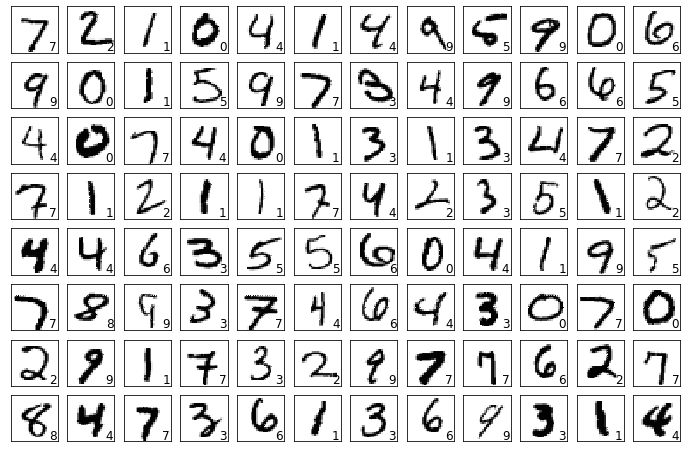

In [7]:
def show_prediction():
    n_show = 96
    y = model.predict(x_test)
    plt.figure(2, figsize=(12, 8))
    plt.gray()
    for i in range(n_show):
        plt.subplot(8, 12, i+1)
        x = x_test[i, :]
        x = x.reshape(28, 28)
        plt.pcolor(1-x)
        wk = y[i, :]
        prediction = np.argmax(wk)
        plt.text(22, 25.5, "%d" % prediction, fontsize=12)
        if prediction != np.argmax(y_test[i, :]):
            plt.plot([0, 27], [1, 1], color = 'cornflowerblue', linewidth = 5)
        plt.xlim(0, 27)
        plt.ylim(27, 0)
        plt.xticks([], "")
        plt.yticks([], "")
        
show_prediction()
plt.show()

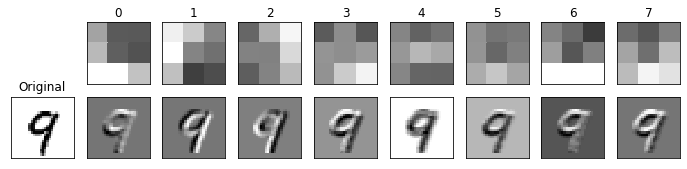

In [13]:
plt.figure(1, figsize=(12, 2.5))
plt.gray()
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.subplot(2, 9, 10)
id_img = 12
x_img = x_test[id_img, :, :, 0]
img_h = 28
img_w = 28
x_img = x_img.reshape(img_h, img_w)
plt.pcolor(-x_img)
plt.xlim(0, img_h)
plt.ylim(img_w, 0)
plt.xticks([], "")
plt.yticks([], "")
plt.title("Original")

w = model.layers[0].get_weights()[0]
max_w = np.max(w)
min_w = np.min(w)
for i in range(8):
    plt.subplot(2, 9, i+2)
    w1 = w[:, :, 0, i]
    w1 = w1.reshape(3, 3)
    plt.pcolor(-w1, vmin=min_w, vmax = max_w)
    plt.xlim(0, 3)
    plt.ylim(3, 0)
    plt.xticks([], "")
    plt.yticks([], "")
    plt.title("%d" % i)
    plt.subplot(2, 9, i+11)
    out_img = np.zeros_like(x_img)
    
    for ih in range(img_h - 3):
        for iw in range(img_w - 3):
            img_part = x_img[ih:ih+3, iw:iw+3]
            out_img[ih+1, iw+1] = \
            np.dot(img_part.reshape(-1), w1.reshape(-1))
        
    plt.pcolor(-out_img)
    plt.xlim(0, img_w)
    plt.ylim(img_h, 0)
    plt.xticks([], "")
    plt.yticks([], "")
plt.show()

In [15]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adam
import time

model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape=(28, 28, 1), activation = 'relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

startTime = time.time()

history = model.fit(x_train, y_train, batch_size = 1000, epochs = 20, verbose = 1, validation_data = (x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy: ', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 42s 700us/step - loss: 0.6282 - accuracy: 0.8108 - val_loss: 0.1281 - val_accuracy: 0.9623
Epoch 2/20
60000/60000 [==============================] - 38s 641us/step - loss: 0.1324 - accuracy: 0.9614 - val_loss: 0.0644 - val_accuracy: 0.9795
Epoch 3/20
60000/60000 [==============================] - 39s 644us/step - loss: 0.0890 - accuracy: 0.9724 - val_loss: 0.0460 - val_accuracy: 0.9851
Epoch 4/20
60000/60000 [==============================] - 40s 667us/step - loss: 0.0688 - accuracy: 0.9787 - val_loss: 0.0385 - val_accuracy: 0.9878
Epoch 5/20
60000/60000 [==============================] - 39s 655us/step - loss: 0.0578 - accuracy: 0.9819 - val_loss: 0.0350 - val_accuracy: 0.9886
Epoch 6/20
60000/60000 [==============================] - 39s 653us/step - loss: 0.0510 - accuracy: 0.9840 - val_loss: 0.0308 - val_accuracy: 0.9904
Epoch 7/20
60000/60000 [==============================] 

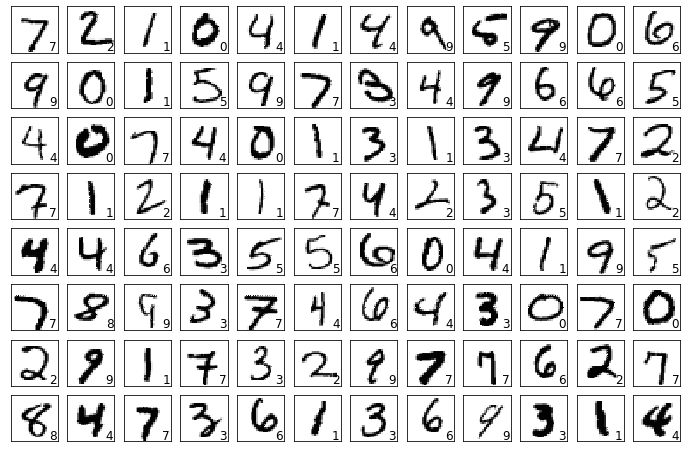

In [16]:
show_prediction()
plt.show()